In [ ]:
#Social_Network_Ads.csv

**Importing the libraries**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

**Importing the dataset**

In [2]:
df = pd.read_csv("Social_Network_Ads.csv")
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


**Splitting the dataset into the Training set and Test set**

In [49]:
x= df[["Age","EstimatedSalary"]].values
y= df["Purchased"]
from sklearn.model_selection import train_test_split
x_train, x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state= 0)
print(x_train)

print(y_test)

[[    58 144000]
 [    59  83000]
 [    24  55000]
 [    26  35000]
 [    58  38000]
 [    42  80000]
 [    40  75000]
 [    59 130000]
 [    46  41000]
 [    41  60000]
 [    42  64000]
 [    37 146000]
 [    23  48000]
 [    25  33000]
 [    24  84000]
 [    27  96000]
 [    23  63000]
 [    48  33000]
 [    48  90000]
 [    42 104000]
 [    44  39000]
 [    32 120000]
 [    38  50000]
 [    32 135000]
 [    52  21000]
 [    53 104000]
 [    39  42000]
 [    38  61000]
 [    36  50000]
 [    36  63000]
 [    35  25000]
 [    35  50000]
 [    42  73000]
 [    47  49000]
 [    59  29000]
 [    49  65000]
 [    45 131000]
 [    31  89000]
 [    46  82000]
 [    47  51000]
 [    26  15000]
 [    60 102000]
 [    38 112000]
 [    40 107000]
 [    42  53000]
 [    35  59000]
 [    48  41000]
 [    48 134000]
 [    38 113000]
 [    29 148000]
 [    26  15000]
 [    60  42000]
 [    24  19000]
 [    42 149000]
 [    46  96000]
 [    28  59000]
 [    39  96000]
 [    28  89000]
 [    41  7200

**Feature Scaling**

In [50]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
x_train=scale.fit_transform(x_train)
x_test=scale.transform(x_test)

**Fitting Random Forest to the Training set**

In [68]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, plot_roc_curve,confusion_matrix, f1_score, roc_curve
clf = RandomForestClassifier(n_estimators = 100,random_state=50)
clf.fit(x_train, y_train)

RandomForestClassifier(random_state=50)

**Predicting the Test set results**

In [52]:
y_pred = clf.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1], dtype=int64)

In [70]:
print("accuracy_score : ",accuracy_score(y_test, y_pred))
print("f1_score : ",f1_score(y_test, y_pred))
y_score1 = clf.predict_proba(x_test)[:,1]
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test, y_score1)
print('roc_auc_score for logistic_regression: ', roc_auc_score(y_test, y_score1))

accuracy_score :  0.9375
f1_score :  0.8936170212765958
roc_auc_score for logistic_regression:  0.9796238244514106


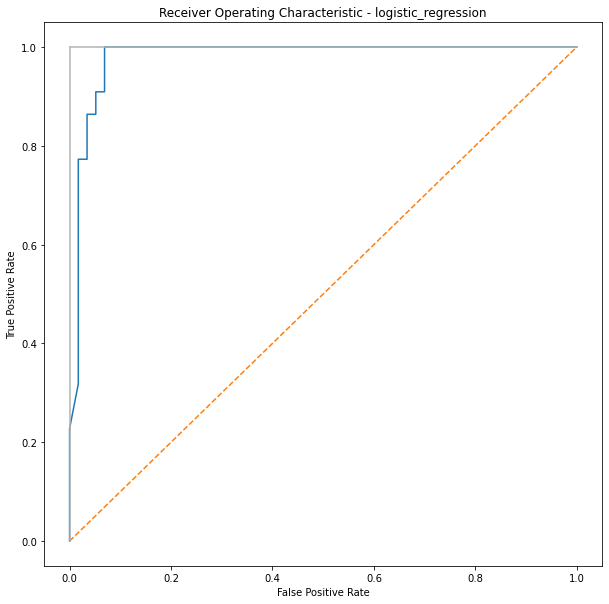

In [71]:
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - logistic_regression')
plt.plot(false_positive_rate1, true_positive_rate1)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

**Making the Confusion Matrix**

In [59]:
confusion_matrix(y_test,y_pred)

array([[54,  4],
       [ 1, 21]], dtype=int64)

**Visualising the Training set results**

Text(0, 0.5, 'y_train')

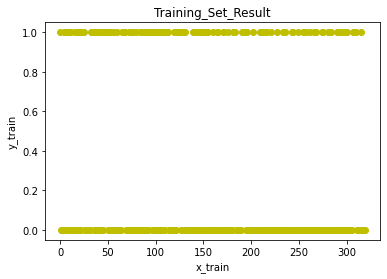

In [43]:
x_train=np.arange(0,len(x_train),1)
plt.scatter(x= x_train, y=y_train,c='y')
plt.title("Training_Set_Result")
plt.xlabel("x_train")
plt.ylabel("y_train")

**Visualising the Test set results**

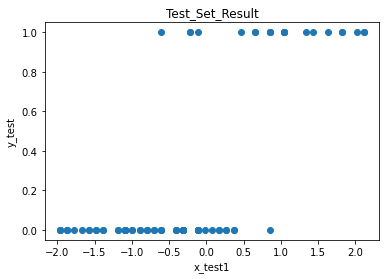

In [44]:
plt.scatter(x_test[:,0], y_test)
plt.title('Test_Set_Result')
plt.xlabel('x_test1')
plt.ylabel('y_test')
plt.show()

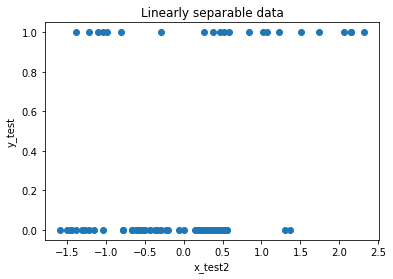

In [45]:
plt.scatter(x_test[:,1], y_test)
plt.title('Linearly separable data')
plt.xlabel('x_test2')
plt.ylabel('y_test')
plt.show()